In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Rainfall prediction/Sub_Division_IMD_2017.csv"

'/content/drive/My Drive/Rainfall prediction/Sub_Division_IMD_2017.csv'


In [ ]:
import pandas as pd
path = "/content/drive/My Drive/Rainfall prediction/Sub_Division_IMD_2017.csv"
df = pd.read_csv(path)

In [ ]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4


In [ ]:
df=df.fillna(df.mean())
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4


In [ ]:
#Here we can see that the dataset contains rainfall in mm for all months of the year and an annual estimate indexed with their respective subdivisions and variations within months
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
SUBDIVISION    4188 non-null object
YEAR           4188 non-null int64
JAN            4188 non-null float64
FEB            4188 non-null float64
MAR            4188 non-null float64
APR            4188 non-null float64
MAY            4188 non-null float64
JUN            4188 non-null float64
JUL            4188 non-null float64
AUG            4188 non-null float64
SEP            4188 non-null float64
OCT            4188 non-null float64
NOV            4188 non-null float64
DEC            4188 non-null float64
ANNUAL         4188 non-null float64
JF             4188 non-null float64
MAM            4188 non-null float64
JJAS           4188 non-null float64
OND            4188 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 621.8+ KB


In [ ]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000,4188.000000
mean,1959.220630,18.938337,21.599427,27.412912,43.071845,85.660860,230.117475,347.020043,289.742185,197.316332,95.324707,39.496433,18.968645,1409.449207,40.522979,155.820914,1063.851580,153.648623
std,33.717097,33.776982,35.718931,46.894327,68.118424,122.651174,234.152152,268.625870,188.336044,135.450491,99.111897,68.268852,43.002315,899.792622,59.251404,200.982272,705.821659,166.603928
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.500000,1.000000,3.000000,8.675000,70.875000,175.900000,155.975000,100.400000,14.600000,0.600000,0.100000,805.275000,4.000000,24.175000,574.375000,34.175000
50%,1959.000000,6.000000,6.500000,7.900000,15.500000,36.900000,139.000000,285.250000,258.900000,173.900000,65.750000,9.450000,3.100000,1124.150000,19.000000,75.150000,881.500000,98.350000
75%,1988.000000,22.000000,26.600000,31.300000,49.525000,97.725000,304.300000,418.400000,377.525000,265.825000,148.100000,45.000000,17.700000,1634.075000,50.100000,196.900000,1284.525000,211.350000
max,2017.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [ ]:
df.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
#Exploration of Data
'''The non numerical variable identified from the dataset is the subdivsion and it has multiple entries for various states and union
   territories across India and therefore we need to first of all identify all distinct values of this column for which we have 36
   unique values'''
unique_subdivs = df['SUBDIVISION'].unique()
unique_subdivs

array(['Andaman & Nicobar Islands', 'Arunachal Pradesh',
       'Assam & Meghalaya', 'Naga Mani Mizo Tripura',
       'Sub Himalayan West Bengal & Sikkim', 'Gangetic West Bengal',
       'Orissa', 'Jharkhand', 'Bihar', 'East Uttar Pradesh',
       'West Uttar Pradesh', 'Uttarakhand', 'Haryana Delhi & Chandigarh',
       'Punjab', 'Himachal Pradesh', 'Jammu & Kashmir', 'West Rajasthan',
       'East Rajasthan', 'West Madhya Pradesh', 'East Madhya Pradesh',
       'Gujarat Region', 'Saurashtra & Kutch', 'Konkan & Goa',
       'Madhya Maharashtra', 'Matathwada', 'Vidarbha', 'Chhattisgarh',
       'Coastal Andhra Pradesh', 'Telangana', 'Rayalseema', 'Tamil Nadu',
       'Coastal Karnataka', 'North Interior Karnataka',
       'South Interior Karnataka', 'Kerala', 'Lakshadweep'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d5e1c6e80>,
      dtype=object)

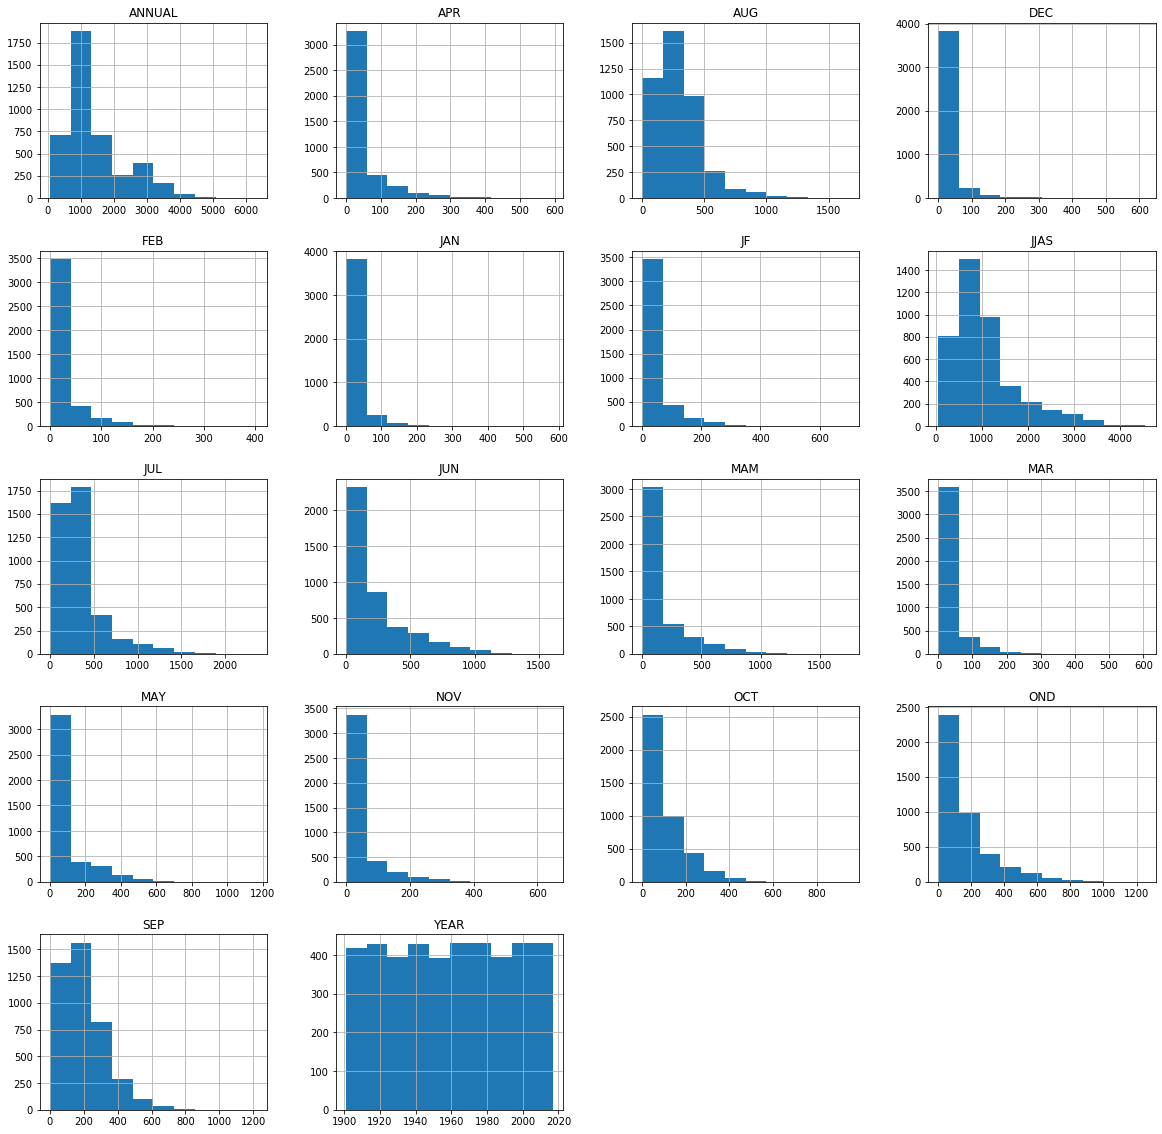

In [ ]:
'''The data is dating from 1901 to 2015 and let us plot a simple historgram to see the variations
   and we can point out that the period of June to September is most contributing to rainfall (mm)'''
df.hist(figsize=(20,20))

In [ ]:
#To check the states having highest and lowest rainfall contribution in India
'''We find that Coastal Karnataka has the highest annual rainfall while West Rajasthan is at the least'''
max_min = df.groupby('SUBDIVISION').sum()[['ANNUAL']].sort_values(by = 'ANNUAL', ascending = False)
max_min

,ANNUAL
SUBDIVISION,
Coastal Karnataka,395535.449207
Konkan & Goa,349541.200000
Kerala,340966.900000
Arunachal Pradesh,325024.895243
Sub Himalayan West Bengal & Sikkim,321814.700000
Andaman & Nicobar Islands,318652.295243
Assam & Meghalaya,301758.600000
Naga Mani Mizo Tripura,284628.000000
Lakshadweep,182169.841278


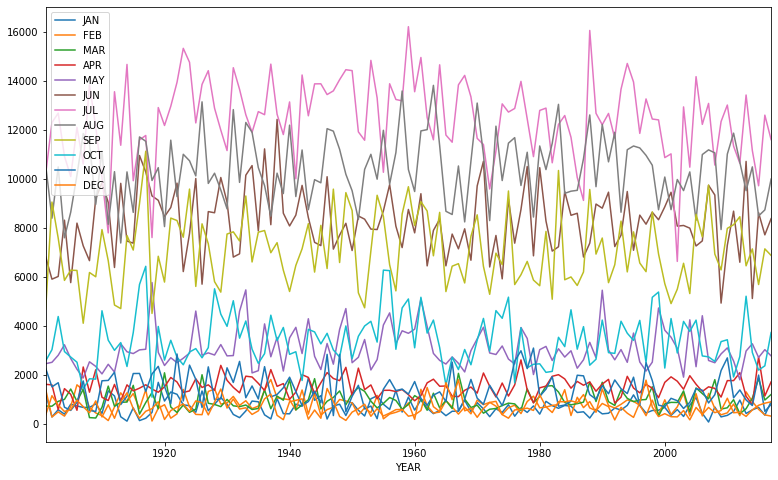

In [ ]:
#Monthly variations of Rainfall
df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(13,8))

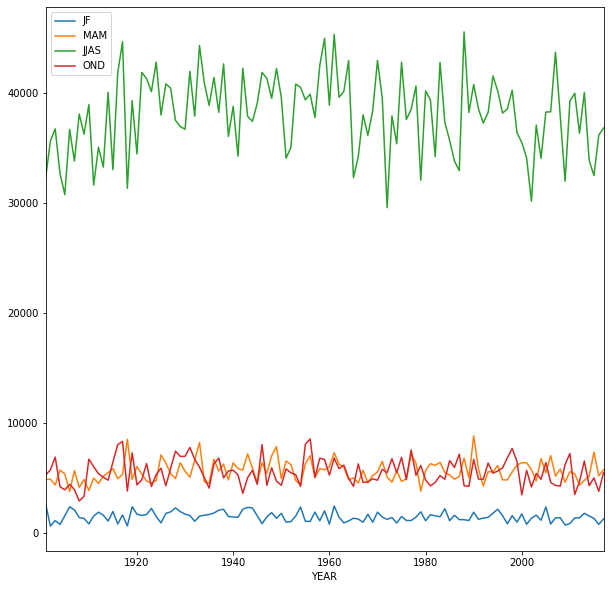

In [ ]:
#Seasonal Variations of Rainfall which clearly indicates June to September as prime onset of Monsoons
df[['YEAR', 'JF','MAM','JJAS','OND']].groupby("YEAR").sum().plot(figsize=(10,10))

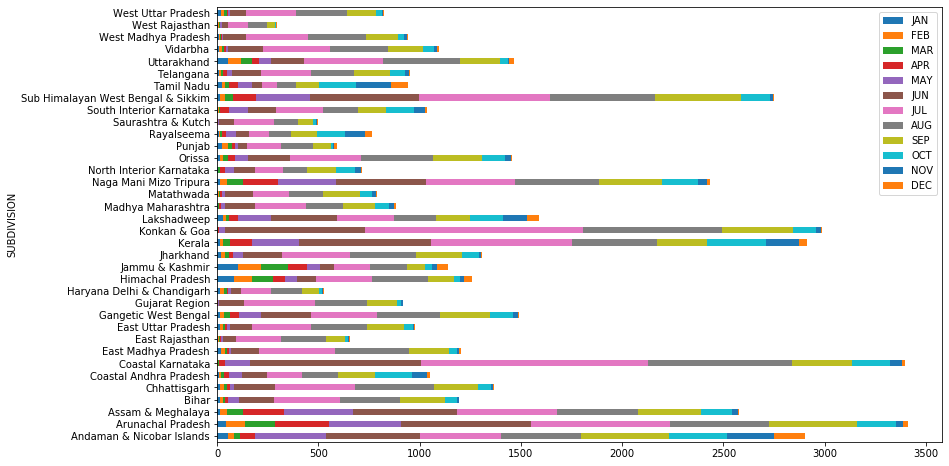

In [ ]:
df[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));

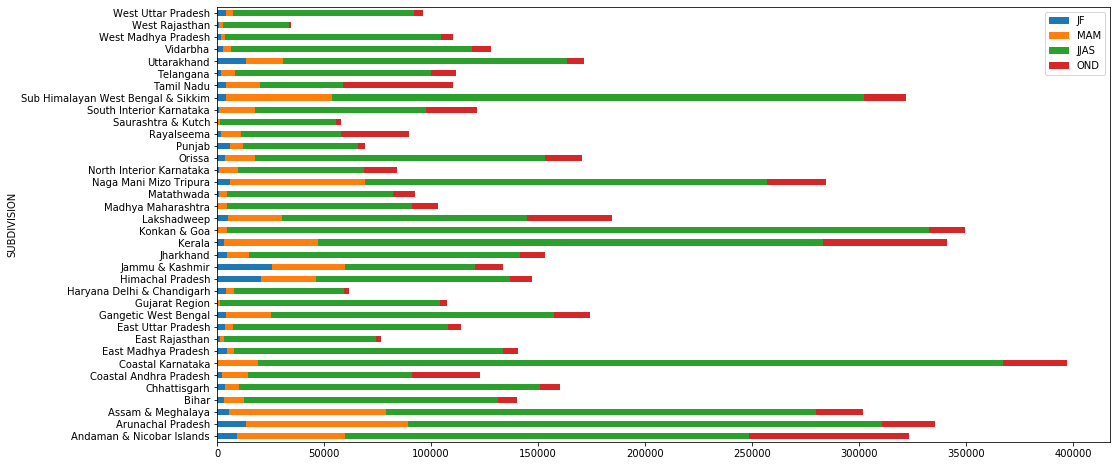

In [ ]:
df[['SUBDIVISION', 'JF','MAM','JJAS','OND']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));

Text(0, 0.5, 'Rainfall (in mm)')

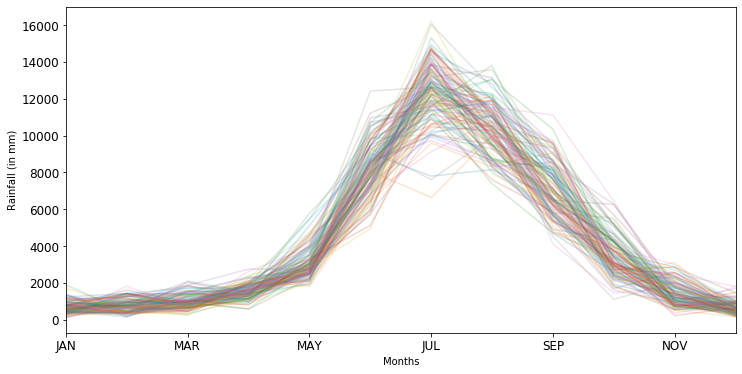

In [ ]:
#Seasonal variations across India
import matplotlib.pyplot as plt
drop_columns = ['ANNUAL', 'JF','MAM','JJAS','OND']
fig, ax = plt.subplots()
(df.groupby(by='YEAR').sum().drop(drop_columns, axis=1).T.plot(alpha=0.2, figsize=(12, 6), legend=False, fontsize=12, ax=ax))
ax.set_xlabel('Months', fontsize=10)
ax.set_ylabel('Rainfall (in mm)', fontsize=10)

In [ ]:
district = pd.read_csv("/content/drive/My Drive/Rainfall prediction/district wise rainfall normal.csv",sep=",")
district = district.fillna(district.mean())
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 19 columns):
STATE_UT_NAME    641 non-null object
DISTRICT         641 non-null object
JAN              641 non-null float64
FEB              641 non-null float64
MAR              641 non-null float64
APR              641 non-null float64
MAY              641 non-null float64
JUN              641 non-null float64
JUL              641 non-null float64
AUG              641 non-null float64
SEP              641 non-null float64
OCT              641 non-null float64
NOV              641 non-null float64
DEC              641 non-null float64
ANNUAL           641 non-null float64
Jan-Feb          641 non-null float64
Mar-May          641 non-null float64
Jun-Sep          641 non-null float64
Oct-Dec          641 non-null float64
dtypes: float64(17), object(2)
memory usage: 95.3+ KB


In [ ]:
district.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


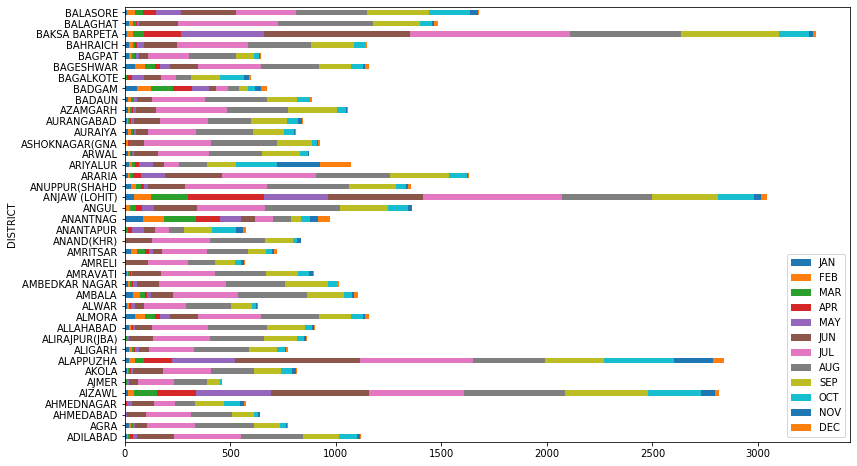

In [ ]:
district[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(13,8));

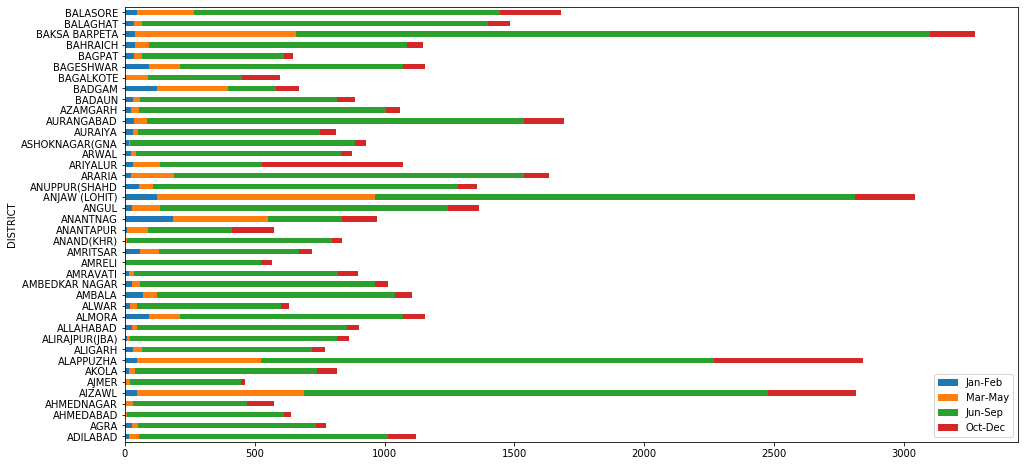

In [ ]:
district[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

In [ ]:
mh_data = district[district['STATE_UT_NAME'] == 'MAHARASHTRA']

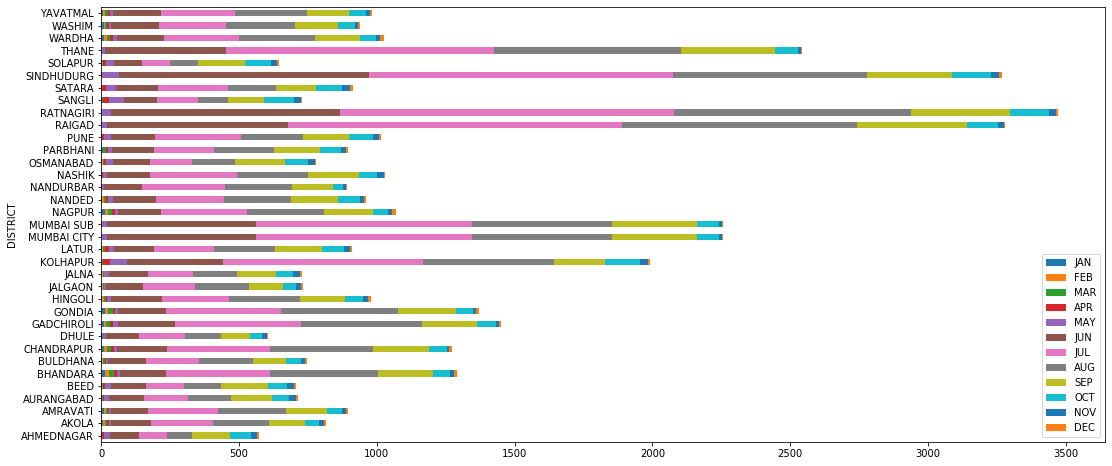

In [ ]:
mh_data[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(18,8));

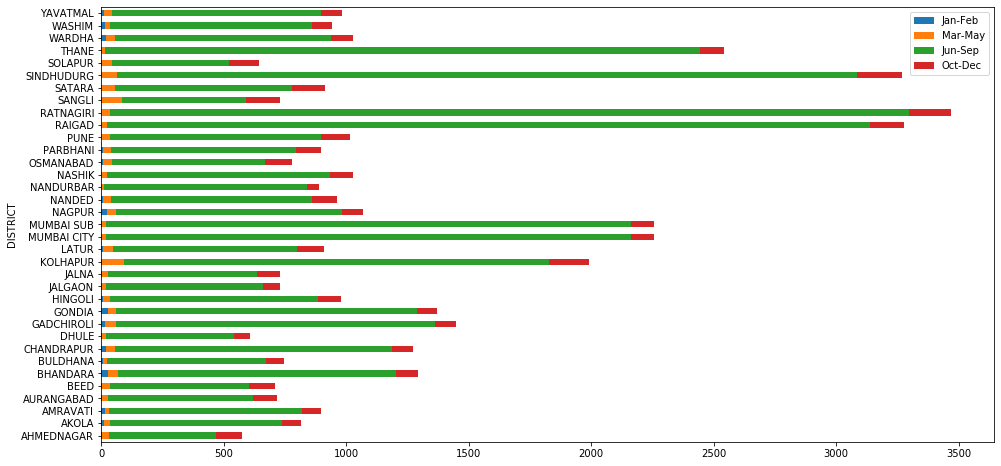

In [ ]:
mh_data[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));